In [1]:
import va_utils
import va_plots
import cantoria_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook", font_scale=1.25)
sns.color_palette("colorblind")
plt.rcParams.update({"figure.dpi": 300})

2023-12-18 02:46:26.449311: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
sh: 1: load_ext: not found


In [2]:
kfold_sscs_metrics = pd.DataFrame()
kfold_cantoria_metrics = pd.DataFrame()

In [3]:
for i in range(1, 6):
    log_folder = 'mask_voas_v2_treino2'
    model_name = 'MaskVoasCNNv2'
    metrics_dir = './Evaluation_Data/' + log_folder + '_kfold_' + str(i) + '.h5'
    mix_metrics, sop_metrics, alto_metrics, ten_metrics, bass_metrics = va_plots.metrics_load_precomputed(metrics_dir)

    sop_metrics['F1-Score'] = sop_metrics['F-Measure']
    alto_metrics['F1-Score'] = alto_metrics['F-Measure']
    ten_metrics['F1-Score'] = ten_metrics['F-Measure']
    bass_metrics['F1-Score'] = bass_metrics['F-Measure']
    sop_metrics['Voz'] = 'Soprano'
    alto_metrics['Voz'] = 'Contralto'
    ten_metrics['Voz'] = 'Tenor'
    bass_metrics['Voz'] = 'Baixo'
    sop_metrics['Fold'] = i
    alto_metrics['Fold'] = i
    ten_metrics['Fold'] = i
    bass_metrics['Fold'] = i
    
    tmp_sscs_metrics = pd.concat([sop_metrics, alto_metrics, ten_metrics, bass_metrics])[['F1-Score', 'Voz', 'Fold']]
    kfold_sscs_metrics = pd.concat([kfold_sscs_metrics, tmp_sscs_metrics]).reset_index(drop=True)

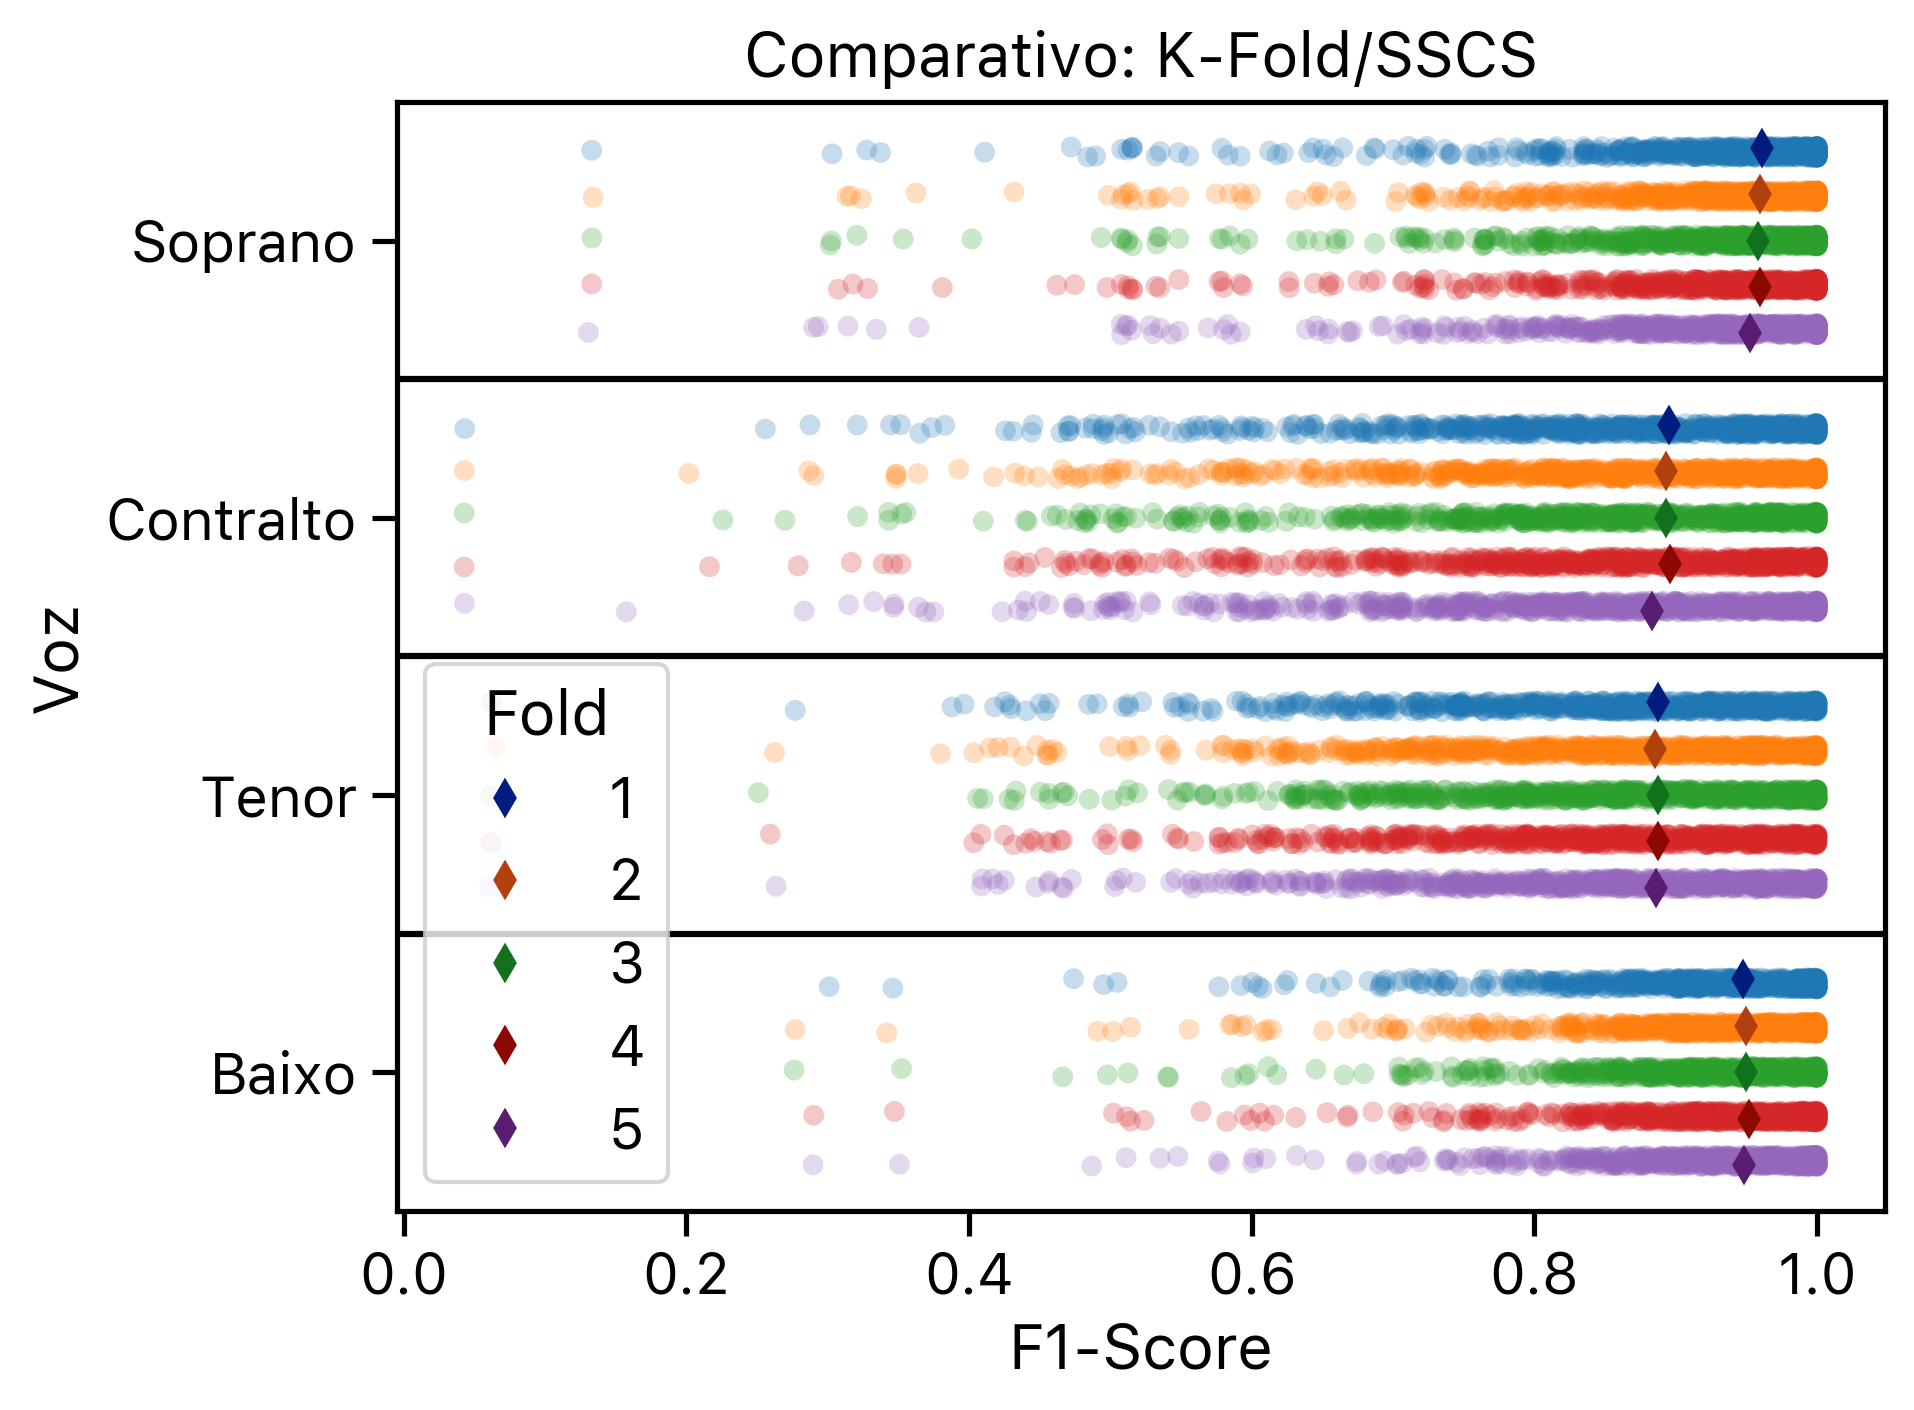

In [4]:
fig, ax = plt.subplots()

ax.set_title('Comparativo: K-Fold/SSCS')

strip = sns.stripplot(
    data=kfold_sscs_metrics, x="F1-Score", y="Voz", hue="Fold",
    dodge=True, alpha=.25, zorder=1, legend=False,
    palette='tab10'
)

point = sns.pointplot(
    data=kfold_sscs_metrics, x="F1-Score", y="Voz", hue="Fold",
    dodge=.67, palette='dark', errorbar=None, estimator='median',
    markers="d", markersize=4, linestyle="none",
)

point.axhline(0.5, c='black')
point.axhline(1.5, c='black')
point.axhline(2.5, c='black')

#plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [5]:
for i in range(1, 6):
    log_folder = 'mask_voas_v2_treino2'
    model_name = 'MaskVoasCNNv2'

    mix_df, sop_df, alto_df, ten_df, bass_df = cantoria_utils.compute_kfold_metrics(train=2, fold=i)
    sop_df['F1-Score'] = sop_df['F-Measure']
    alto_df['F1-Score'] = alto_df['F-Measure']
    ten_df['F1-Score'] = ten_df['F-Measure']
    bass_df['F1-Score'] = bass_df['F-Measure']
    sop_df['Voz'] = 'Soprano'
    alto_df['Voz'] = 'Contralto'
    ten_df['Voz'] = 'Tenor'
    bass_df['Voz'] = 'Baixo'
    sop_df['Fold'] = i
    alto_df['Fold'] = i
    ten_df['Fold'] = i
    bass_df['Fold'] = i
    
    tmp_cantoria_metrics = pd.concat([sop_df, alto_df, ten_df, bass_df])[['F1-Score', 'Voz', 'Fold']]
    kfold_cantoria_metrics = pd.concat([kfold_cantoria_metrics, tmp_cantoria_metrics]).reset_index(drop=True)


2023-12-18 02:46:32.008340: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-18 02:46:32.015197: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-18 02:46:32.015435: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

1/1 [==============================] - 1s 669ms/step


2023-12-18 02:46:33.104629: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1/1 [==============================] - 0s 15ms/step


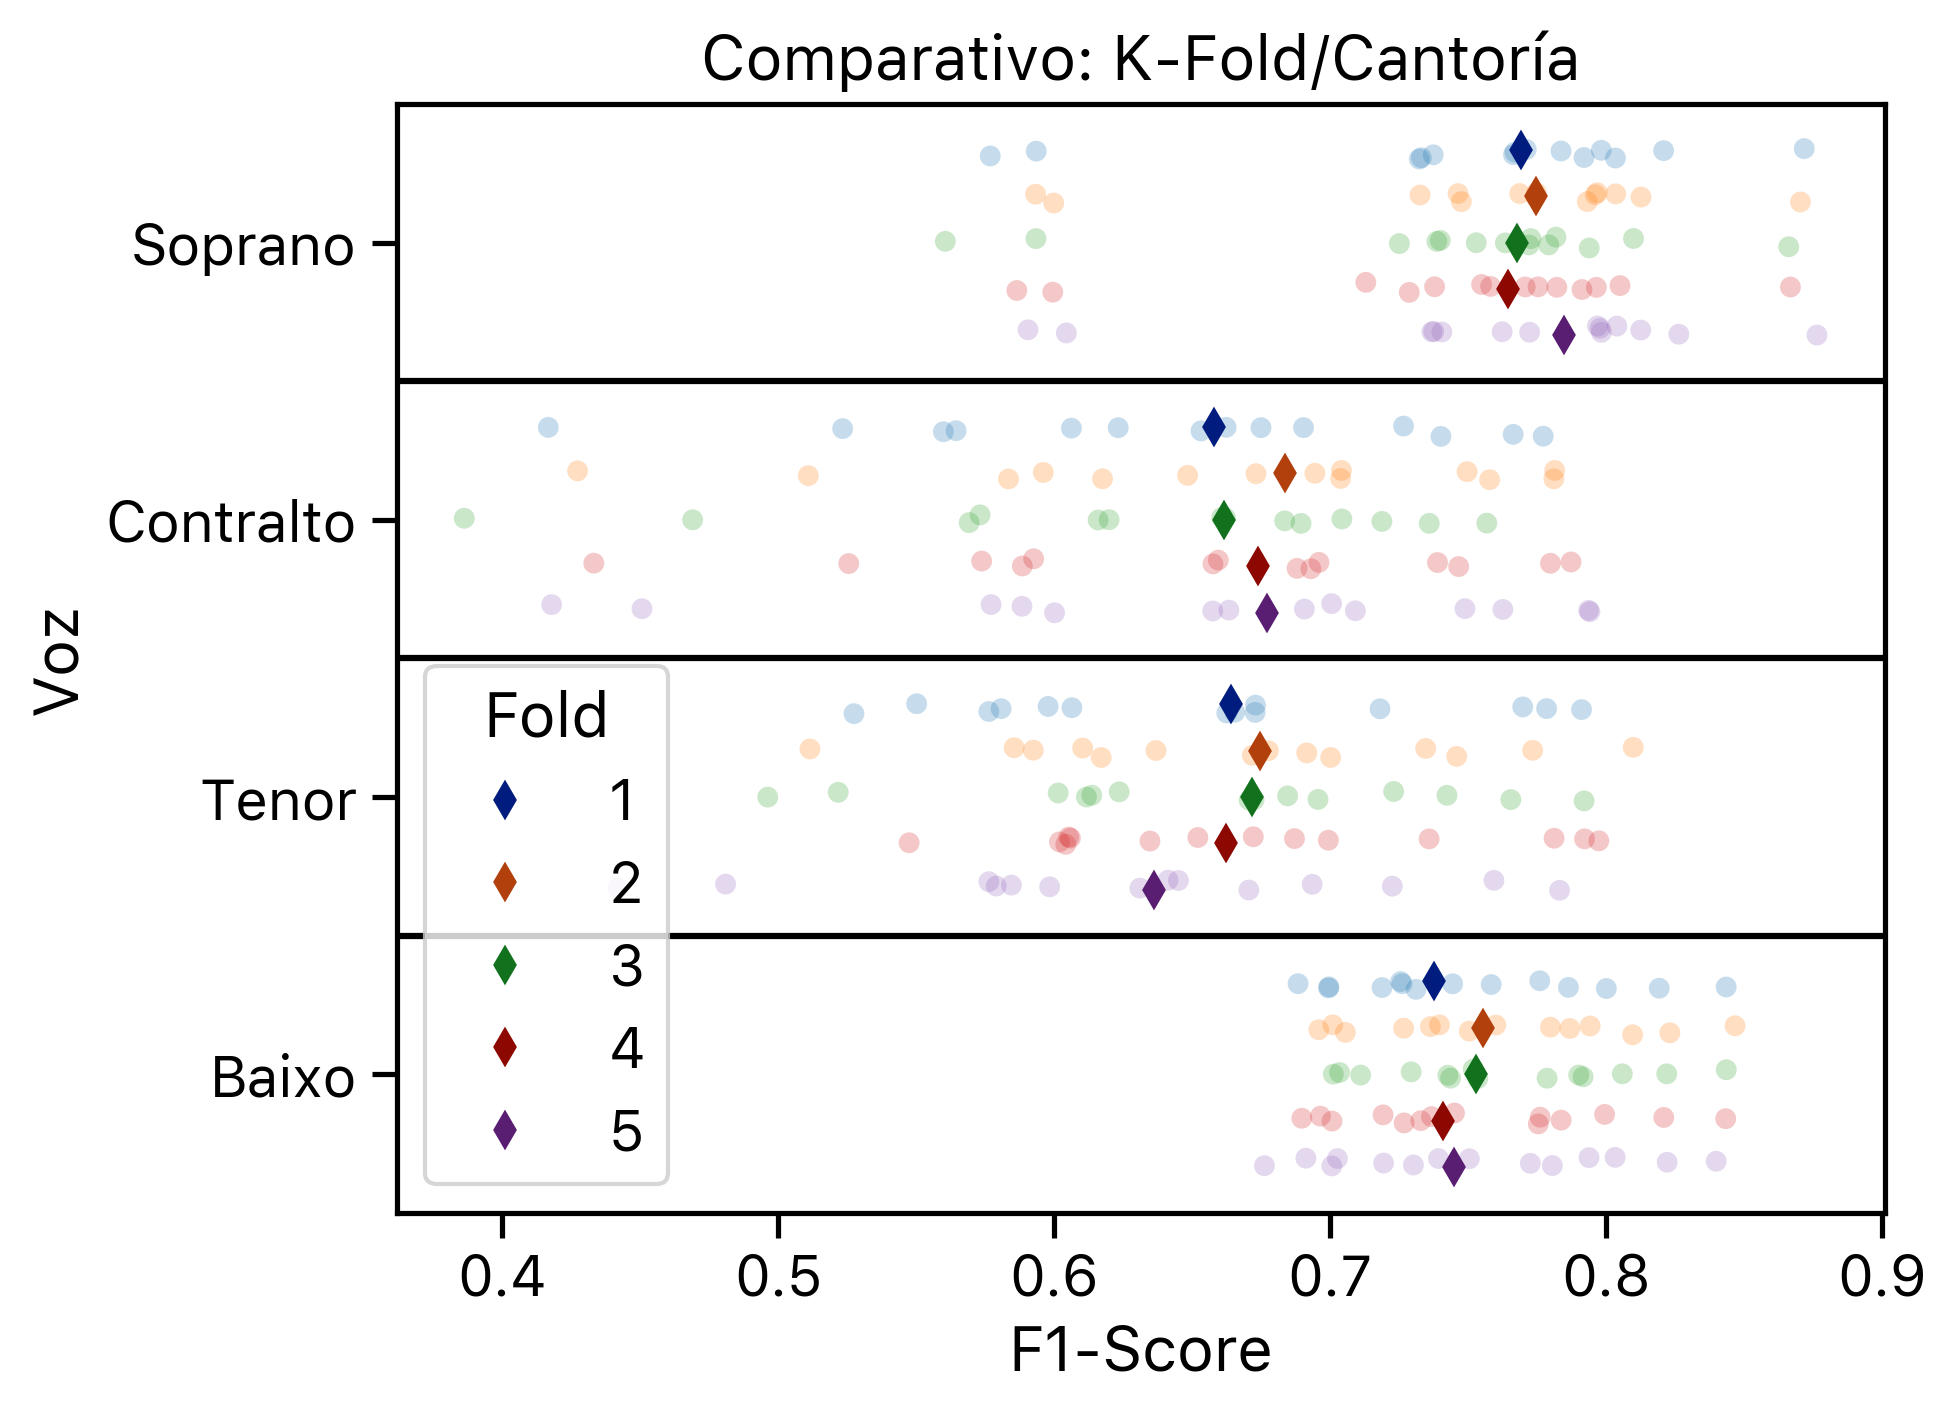

In [6]:
fig, ax = plt.subplots()

ax.set_title('Comparativo: K-Fold/Cantoría')

strip = sns.stripplot(
    data=kfold_cantoria_metrics, x="F1-Score", y="Voz", hue="Fold",
    dodge=True, alpha=.25, zorder=1, legend=False,
    palette='tab10'
)

point = sns.pointplot(
    data=kfold_cantoria_metrics, x="F1-Score", y="Voz", hue="Fold",
    dodge=.67, palette="dark", errorbar=None, estimator='median',
    markers="d", markersize=4, linestyle="none",
)

#plt.legend(bbox_to_anchor=(1, 1), loc=2)

point.axhline(0.5, c='black')
point.axhline(1.5, c='black')
point.axhline(2.5, c='black')